In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/customer_churn_dataset-training-master.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
df.shape

(440833, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


**EDA (Exploratory Data Analysis)**

In [6]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


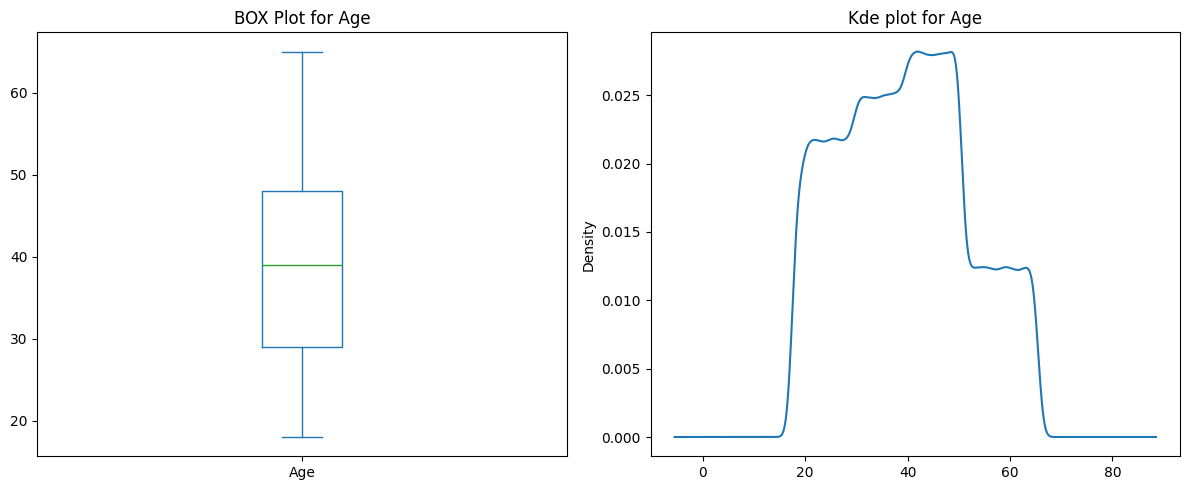

In [7]:
fig,axes = plt.subplots(1,2,figsize = (12,5))
df['Age'].plot(kind = 'box',ax= axes[0])
axes[0].set_title('BOX Plot for Age')
df['Age'].plot(kind = 'kde',ax=axes[1])
axes[1].set_title('Kde plot for Age')
plt.tight_layout()
plt.show()

* We can observe that the Age lies between the 18 to 60.
* The heighest density of the Age lies in 20 to 50.






<Axes: ylabel='Density'>

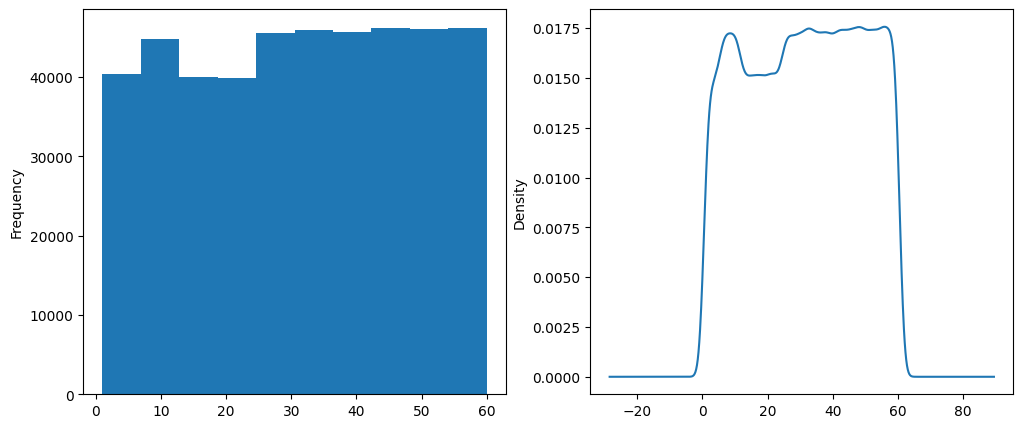

In [8]:
fig,axes = plt.subplots(1,2,figsize=(12,5))
df['Tenure'].plot(kind = 'hist',ax=axes[0])
df['Tenure'].plot(kind='kde',ax=axes[1])

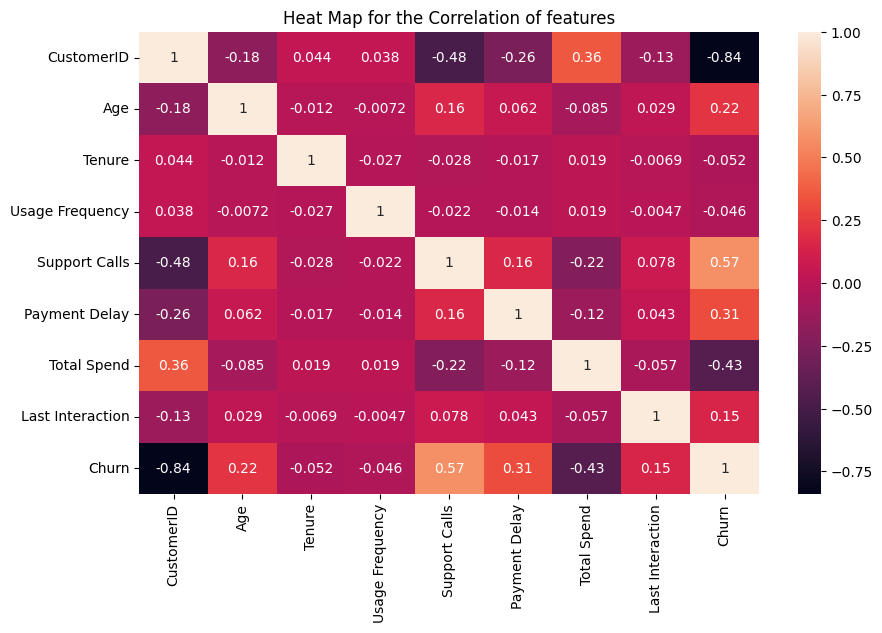

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64']).corr(),annot=True)
plt.title('Heat Map for the Correlation of features')
plt.show()



1.   Age, Support Calls and Payment Delay and Last Interaction are the Positive correlated to the Churning one
2.   Total Spend is in the Negative correlated to the churning one



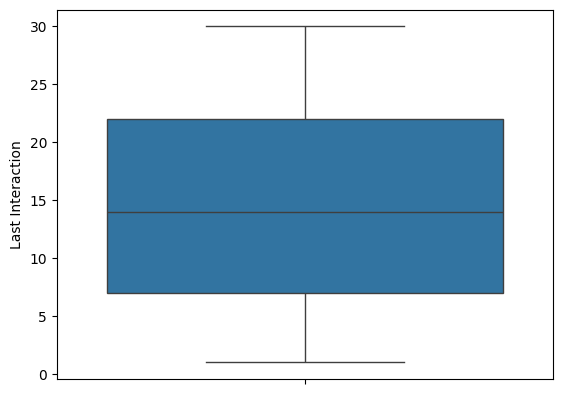

In [14]:
sns.boxplot(df['Last Interaction'])
plt.show()

Around two weeks in the Last Interaction for the Most of the Users.

In [15]:
df['Subscription Type'].value_counts()

,count
Subscription Type,
Standard,149128
Premium,148678
Basic,143026


In [16]:
df['Contract Length'].value_counts()

,count
Contract Length,
Annual,177198
Quarterly,176530
Monthly,87104


In [17]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [33]:
df_final = df[['Age', 'Gender', 'Usage Frequency',
        'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']].copy()

In [34]:
df_final.head()

,Age,Gender,Usage Frequency,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,14.0,18.0,1,2,932.0,17.0,1.0
1,65.0,0,1.0,8.0,0,0,557.0,6.0,1.0
2,55.0,0,4.0,18.0,0,1,185.0,3.0,1.0
3,58.0,1,21.0,7.0,1,0,396.0,29.0,1.0
4,23.0,1,20.0,8.0,0,0,617.0,20.0,1.0


In [35]:
df_final['Gender'] = df_final['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [36]:
df_final['Subscription Type'] = df_final['Subscription Type'].apply(lambda x:0 if x=='Basic' else 1 if x=='Standard' else 2)


In [37]:
df_final['Contract Length'] = df_final['Contract Length'].apply(lambda x:0 if x=='Monthly' else 1 if x=='Quarterly' else 2)

In [38]:
df_final.head()

,Age,Gender,Usage Frequency,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,14.0,18.0,2,2,932.0,17.0,1.0
1,65.0,0,1.0,8.0,2,2,557.0,6.0,1.0
2,55.0,0,4.0,18.0,2,2,185.0,3.0,1.0
3,58.0,0,21.0,7.0,2,2,396.0,29.0,1.0
4,23.0,0,20.0,8.0,2,2,617.0,20.0,1.0


In [58]:
df_final.dropna(inplace = True)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = df_final[['Age', 'Gender', 'Usage Frequency',
        'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction']].copy()

In [62]:
Y = df_final[['Churn']].copy()

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state =42)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression()

In [67]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [68]:
# Accuracy Metrics

from sklearn.metrics import accuracy_score,confusion_matrix

In [69]:
print(accuracy_score(Y_train,model.predict(X_train)))
print(accuracy_score(Y_test,model.predict(X_test)))

0.7383862872697886
0.7381786836344664


In [70]:
print(confusion_matrix(Y_train,model.predict(X_train)))
print(confusion_matrix(Y_test,model.predict(X_test)))

[[106029  46741]
 [ 45521 154374]]
[[26449 11614]
 [11470 38634]]


In [71]:
import pickle
pickle_out = open('churn_classifer.pkl',mode= 'wb')
pickle.dump(model,pickle_out)
pickle_out.close()